# Classifaing both Alzheimer's and Brain Tumor 

I will build step by step model to evaluate the MRI Images and find Alzheimer's disease severity, type of Brain tumor on no disease

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

import functions

# For reproducibility
np.random.seed(18)

### Functions

In [56]:
def load_img_from_dir_cat(path):
    '''
    '''
    X = []
    y = []

    for num_label, label in enumerate(listdir(path)):
        # Skip No disease folders
        if label in ('NonDemented', 'no_tumor'):
            continue
        else:
            # Change each image and append to X and y
            for image_file in os.listdir(f'{path}/{label}'):
                 if '.jpg' in image_file:
                    # target_size automatically resizes each img on import
                    image = load_img(f'{path}/{label}/{image_file}', color_mode = 'grayscale', target_size=(256, 256))
                    image = img_to_array(image) / 255
                    X.append(image)
                    y.append(num_label) 
        # For training the model
    if 'train' in path:
        X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=18, stratify=y) 
        
        # Change for TensorFlow models
        X_train = np.array(X_train, dtype='float32')
        X_val = np.array(X_val, dtype='float32')

        y_train = to_categorical(y_train, num_classes=4, dtype='float32')
        y_val = to_categorical(y_val, num_classes=4, dtype='float32')

        return X_train, X_val, y_train, y_val
    # For testing
    else:
        X_test = np.array(X, dtype='float32')
        y_test = to_categorical(y, num_classes=4, dtype='float32')
        return X_test, y_test

In [57]:
def load_img_from_dir_binary(path):
    '''
    '''
    X = []
    y = []

    for label in listdir(path):
        # Change each image and append to X and y
        for image_file in os.listdir(f'{path}/{label}'):
             if '.jpg' in image_file:
                # target_size automatically resizes each img on import
                image = load_img(f'{path}/{label}/{image_file}', color_mode = 'grayscale', target_size=(256, 256))
                image = img_to_array(image) / 255
                X.append(image)
                if label in ('NonDemented', 'no_tumor'):
                    y.append(0)
                else:
                    y.append(1)
    return X, y

In [58]:
def al_bt_load_img_from_dir_binary(path):
    '''
    '''
    X = []
    y = []

    for label in listdir(path):
        # Skip No disease folders
        if label in ('NonDemented', 'no_tumor'):
            # Change each image and append to X and y
            for image_file in os.listdir(f'{path}/{label}'):
                 if '.jpg' in image_file:
                    # target_size automatically resizes each img on import
                    image = load_img(f'{path}/{label}/{image_file}', color_mode = 'grayscale', target_size=(256, 256))
                    image = img_to_array(image) / 255
                    X.append(image)
                    if 'alzheimer' in path:
                        y.append(0)
                    else:
                        y.append(1)
    return X, y

In [59]:
def combine_images_from_two_path_binary(path1, path2, function = load_img_from_dir_binary):
    X_1, y_1 = function(path1)
    X_2, y_2 = function(path2)
    
    X = X_1 + X_2
    y = y_1 + y_2
    if 'train' in path1:
        X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=18, stratify=y) 
        X_train = np.array(X_train, dtype='float32')
        X_val = np.array(X_val, dtype='float32')
        y_train = np.array(y_train, dtype='float32')
        y_val = np.array(y_val, dtype='float32')
        return X_train, X_val, y_train, y_val
    else:
        X_test = np.array(X, dtype='float32')
        y_test = np.array(y, dtype='float32')
        return X_test, y_test

In [61]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

In [60]:
# Path to Alzheimer's data
al_path_train = '../data/alzheimer/train'
al_path_test = '../data/alzheimer/test'

# Path to Brain Tumor data
bt_path_train = '../data/brain_tumor/train'
bt_path_test = '../data/brain_tumor/test'

## Make Binary data Disease - No disease
Combine datasets and make binary data - disease - 1, no disease - 0

In [62]:
X_train, X_val, y_train, y_val = combine_images_from_two_path_binary(al_path_train, bt_path_train)

In [63]:
X_train.shape, y_train.shape

((5993, 256, 256, 1), (5993,))

In [64]:
X_test, y_test = combine_images_from_two_path_binary(al_path_test, bt_path_test)

In [67]:
X_val.shape, y_val.shape

((1998, 256, 256, 1), (1998,))

In [41]:
model = Sequential()


model.add(layers.Input(shape=(256, 256, 1)))

#First Convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
h = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
188/188 [==============================] - 765s 4s/step - loss: 0.5800 - accuracy: 0.7018 - val_loss: 0.4960 - val_accuracy: 0.7142
Epoch 2/50
188/188 [==============================] - 797s 4s/step - loss: 0.3850 - accuracy: 0.8158 - val_loss: 0.3453 - val_accuracy: 0.8313
Epoch 3/50
188/188 [==============================] - 758s 4s/step - loss: 0.2264 - accuracy: 0.9067 - val_loss: 0.2538 - val_accuracy: 0.9009
Epoch 4/50
188/188 [==============================] - 800s 4s/step - loss: 0.1276 - accuracy: 0.9549 - val_loss: 0.1936 - val_accuracy: 0.9339
Epoch 5/50
188/188 [==============================] - 771s 4s/step - loss: 0.0732 - accuracy: 0.9740 - val_loss: 0.1655 - val_accuracy: 0.9605
Epoch 6/50
188/188 [==============================] - 773s 4s/step - loss: 0.0366 - accuracy: 0.9900 - val_loss: 0.1639 - val_accuracy: 0.9635
Epoch 7/50
188/188 [==============================] - 765s 4s/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.2025 - val_accuracy: 0.9575

In [49]:
model.save('../models/model_d_nd.hdf5')

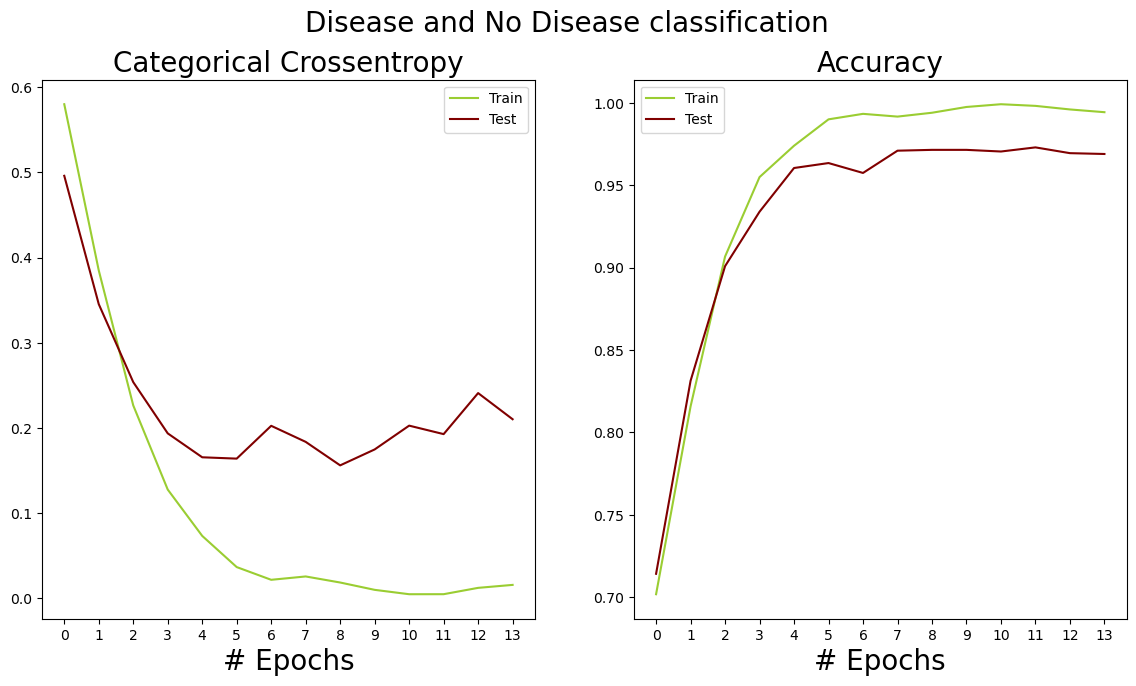

In [52]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h, 'Disease and No Disease classification')

In [91]:
def acc_conf_matrix(model, val_data=None, X=None, y=None, class_names_list = None, binary = False):
    '''
    '''
    # Generate Confusion Matrix
    predictions = np.array([])
    labels =  np.array([])
    if val_data == None:
        if binary:
            predictions = (model.predict(X, verbose = False) > 0.5).astype("int32")
            labels = y  
        else:
            predictions = np.concatenate([predictions, model.predict(X, verbose = False).argmax(axis=1)])
            labels = np.concatenate([labels, np.argmax(y, axis=-1)])

    else:
        for x, y in val_data:
            predictions = np.concatenate([predictions, model.predict(x, verbose = False).argmax(axis=1)])
            labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
    cm = confusion_matrix(labels=labels, predictions=predictions).numpy()
    # Print Accuracy score
    acc = round(accuracy_score(labels, predictions), 4)
    print(f'Accuracy_score: {acc} \n') 
    # Plot the confusion matrix
    if class_names_list:
        fig, ax = plot_confusion_matrix(cm, class_names=class_names_list)    
    else:
        fig, ax = plot_confusion_matrix(cm, class_names=val_data.class_names)   

Accuracy_score: 0.9715 



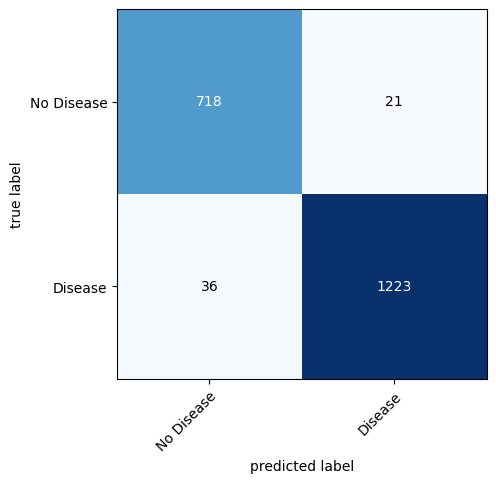

In [88]:
# Plot Confusion Matrix 
acc_conf_matrix(model, X=X_val, y=y_val, class_names_list =  ['No Disease', 'Disease'], binary = True)

Accuracy_score: 0.7077 



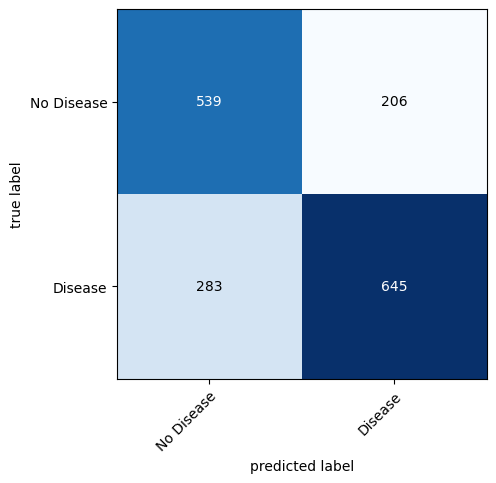

In [92]:
# Plot Confusion Matrix 
acc_conf_matrix(model, X=X_test, y=y_test, class_names_list =  ['No Disease', 'Disease'], binary = True)

## Make Binary data Alzheimer's - Brain tumor
Combine datasets, ignoring No disease images and make binary data - Alzheimer's  - 0, Brain tumor - 1

In [93]:
X_train_al_bt, X_val_al_bt, y_train_al_bt, y_val_al_bt = combine_images_from_two_path_binary(al_path_train, bt_path_train, function = al_bt_load_img_from_dir_binary)

In [ ]:
X_train_al_bt.shape, y_train_al_bt.shape

In [ ]:
X_test_al_bt, y_test_al_bt = combine_images_from_two_path_binary(al_path_test, bt_path_test, function = al_bt_load_img_from_dir_binary)

In [ ]:
model_al_bt = Sequential()


model_al_bt.add(layers.Input(shape=(256, 256, 1)))

#First Convolution
model_al_bt.add(Conv2D(64, (3,3), activation='relu'))
model_al_bt.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolution
model_al_bt.add(Conv2D(64, (3,3), activation='relu'))
model_al_bt.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model_al_bt.add(Flatten())
# Fully Connected
model_al_bt.add(Dense(64, activation = 'relu'))
model_al_bt.add(Dropout(0.2))
model_al_bt.add(Dense(1, activation='sigmoid'))

# Compile
model_al_bt.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

h_al_bt = model_al_bt.fit(X_train_al_bt, y_train_al_bt, validation_data = (X_val_al_bt, y_val_al_bt), epochs=50, callbacks = [es])

In [ ]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_al_bt, 'Alzheimer\'s and Brain Tumor classification')

In [ ]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(model_al_bt, X=X_val_al_bt, y=y_val_al_bt, class_names_list =  ['Alzheimer\'s', 'Brain Tumor'])

In [ ]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(model_al_bt, X=X_test_al_bt, y=y_test_al_bt, class_names_list =  ['Alzheimer\'s', 'Brain Tumor'])

## Predict Sevetiry of Alzeimer's or Type of Brain Tumor

### Sevetiry of Alzeimer's

In [ ]:
X_train_al, X_val_al, y_train_al, y_val_al = load_img_from_dir_cat(al_path_train)

In [ ]:
X_test_al, y_test_al = load_img_from_dir_cat(al_path_test)

In [ ]:
model_al = Sequential()


model_al.add(layers.Input(shape=(image_size, image_size, 1)))
model_al.add(layers.Rescaling(1./255))

#First Convolution
model_al.add(Conv2D(64, (3,3), activation='relu'))
model_al.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolution
model_al.add(Conv2D(64, (3,3), activation='relu'))
model_al.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model_al.add(Flatten())
# Fully Connected
model_al.add(Dense(64, activation = 'relu'))
model_al.add(Dense(3, activation='softmax'))

# Compile
model_al.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_al = model_al.fit(X_train_al, y_train_al, validation_data = (X_val_al, y_val_al), epochs=50, callbacks = [es])

In [ ]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_al, 'Alzheimer\'s severity classification')

In [ ]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(model_al, X=X_val_al, y=y_val_al, class_names_list = ['Mild', 'Moderate', 'Very Mild'])

In [ ]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(model_al, X=X_test_al, y=y_test_al, class_names_list = ['Mild', 'Moderate', 'Very Mild'])

### Type of Brain Tumor

In [ ]:
X_train_bt, X_val_bt, y_train_bt, y_val_bt = load_img_from_dir_cat(bt_path_train)

In [ ]:
X_test_bt, y_test_bt = load_img_from_dir_cat(bt_path_test)

In [ ]:
model_bt = Sequential()
model_bt.add(layers.Input(shape=(image_size, image_size, 1)))
model_bt.add(layers.Rescaling(1./255))
model_bt.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model_bt.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model_bt.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model_bt.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model_bt.add(Conv2D(128,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model_bt.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model_bt.add(Conv2D(256,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model_bt.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model_bt.add(Conv2D(512,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model_bt.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model_bt.add(Flatten())
model_bt.add(Dropout(0.2))
model_bt.add(Dense(256, activation="linear", kernel_regularizer=l2(0.005)))
model_bt.add(Dropout(0.2))
model_bt.add(Dense(256, activation="linear", kernel_regularizer=l2(0.005)))
model_bt.add(Dropout(0.2))
model_bt.add(Dense(3, activation='softmax'))
# Compile
model_bt.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_bt = model_bt.fit(X_train_bt, y_train_bt, validation_data = (X_val_bt, y_val_bt), epochs=50, callbacks = [es])

In [ ]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_bt, 'Brain Tumor types classification')

In [ ]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(model_bt, X=X_val_bt, y=y_val_bt, class_names_list = ['Glioma', 'Meningioma', 'Pituitary'])

In [ ]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(model_bt, X=X_test_bt, y=y_test_bt, class_names_list = ['Glioma', 'Meningioma', 'Pituitary'])

## Combine all to classify a single input image